<a href="https://colab.research.google.com/github/YungPyung/neurotech-education/blob/main/Completed%20Versions/Intro_to_EEG_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Intro to EEG Data Analysis** | NeuroTech @ UIUC

Full example dataset: https://openneuro.org/datasets/ds002722/versions/1.0.1

Ian Daly, Nicoletta Nicolaou, Duncan Williams, Faustina Hwang, Alexis Kirke, Eduardo Miranda, and Slawomir J. Nasuto (2020). A dataset recorded during development of an affective brain-computer music interface: calibration session. OpenNeuro https://doi.org/10.18112/openneuro.ds002722.v1.0.1

Copyright University of Reading, 2018. This dataset is licensed by the rights-holder(s)
under a Creative Commons Attribution 4.0 International Licence: https://creativecommons.org/licenses/by/4.0/

Williams, D., Kirke, A., Miranda, E.R., Daly, I., Hwang, F., Weaver, J., Nasuto, S.J.,
“Affective Calibration of Musical Feature Sets in an Emotionally Intelligent Music Composition System”,
ACM Trans. Appl. Percept. 14, 3, Article 17 (May 2017), 13 pages. DOI: https://doi.org/10.1145/3059005

In [ ]:
# Packages
!pip -q install mne
!pip -q install gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.6 MB/s eta 0:00:00


In [ ]:
import gdown

# Download data file
link = "https://drive.google.com/uc?id=1KUQI03zqiOs4YnwxQ-4KNIIaczNe96AY"
gdown.download(link)

Downloading...
From: https://drive.google.com/uc?id=1KUQI03zqiOs4YnwxQ-4KNIIaczNe96AY
To: /content/sub-01_task-run1_eeg.edf
100%|██████████| 63.6M/63.6M [00:01<00:00, 36.5MB/s]


'sub-01_task-run1_eeg.edf'

Extracting EDF parameters from /content/sub-01_task-run1_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-489332459.py:9: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(path, preload=True)  # preload=True loads data into memory


Reading 0 ... 858999  =      0.000 ...   858.999 secs...
Using matplotlib as 2D backend.


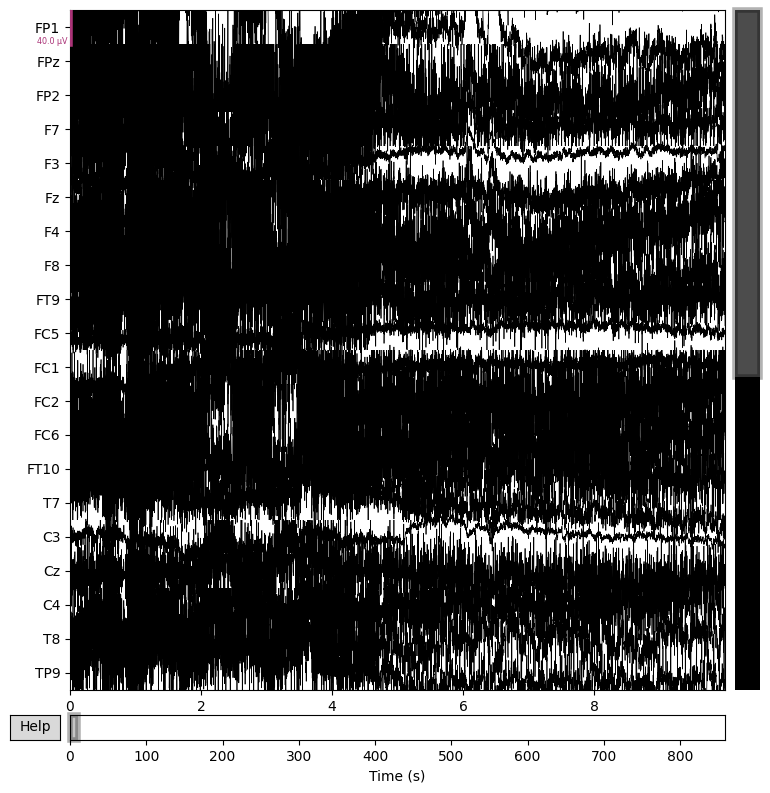

In [ ]:
import mne

"""Basic implementations of MNE are messy."""

# Google Colab file path
path = "/content/sub-01_task-run1_eeg.edf"

# Load data and plot
raw = mne.io.read_raw_edf(path, preload=True)  # preload=True loads data into memory
plot = raw.plot()

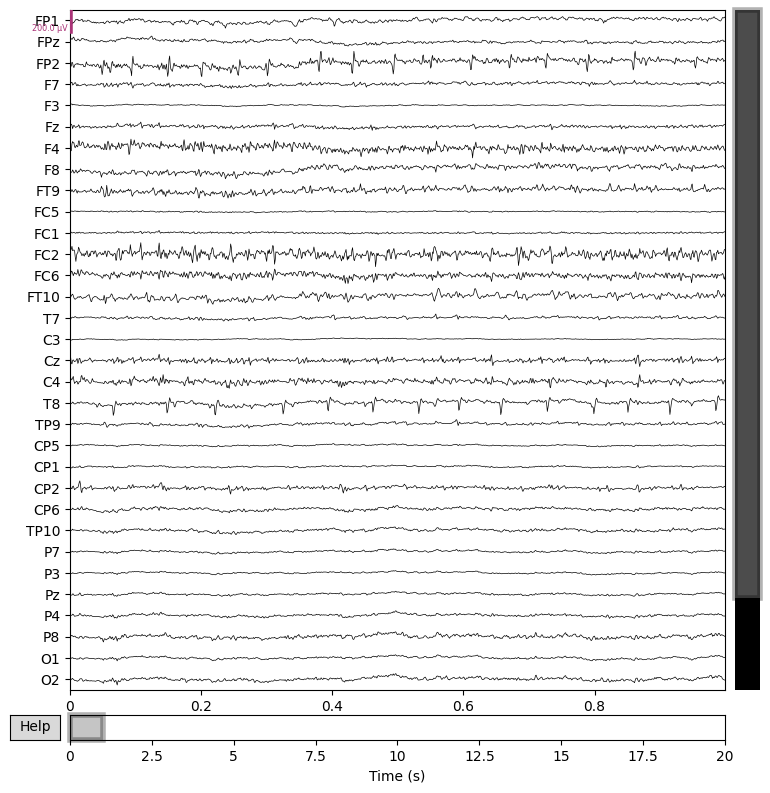

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPz, FP2, F7, F3, Fz, F4, F8, FT9, FC5, FC1, FC2, FC6, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 37
 projs: []
 sfreq: 1000.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


In [ ]:

"""Let's load a trial interval and create a more appealing plot."""

# Supress unnecessary output except errors
mne.set_log_level('ERROR')  # default is 'INFO'

# Load data
raw = mne.io.read_raw_edf(path)  # preload=False by default to use load_data() separately
raw.crop(10, 30)  # Crop data to desired range
raw.load_data()  # Load data into memory, DO NOT USE get_data() for RAW object

# Plot data
plot = raw.plot(n_channels = 32, scalings=dict(eeg=1e-4), duration=1)

# Optional metadata
print(raw.info)


In [ ]:
# Structured plotting
raw.set_montage("standard_1020", on_missing="ignore")
raw.set_eeg_reference("average")

<RawEDF | sub-01_task-run1_eeg.edf, 37 x 20001 (20.0 s), ~5.7 MiB, data loaded>

Text(0.5, 0.98, 'EEG Power Spectral Density (0-70 Hz)')

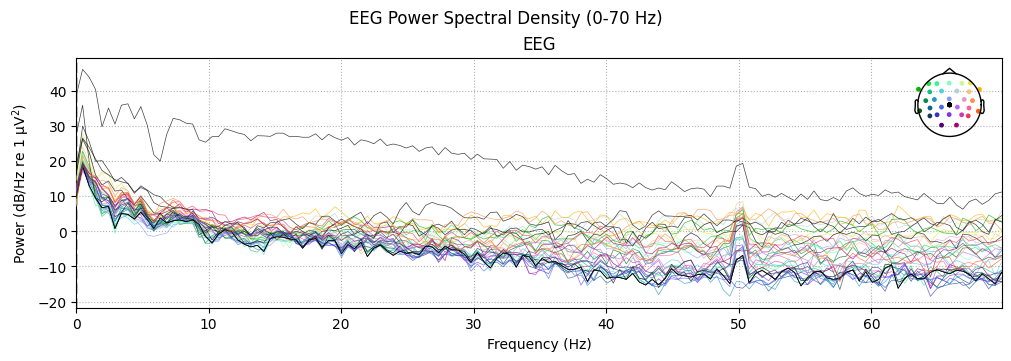

In [ ]:
raw_example = raw.copy()  # Copy the original raw data
psd = raw_example.compute_psd(fmax=70)
fig = psd.plot(picks='eeg')
fig.suptitle("EEG Power Spectral Density (0-70 Hz)")

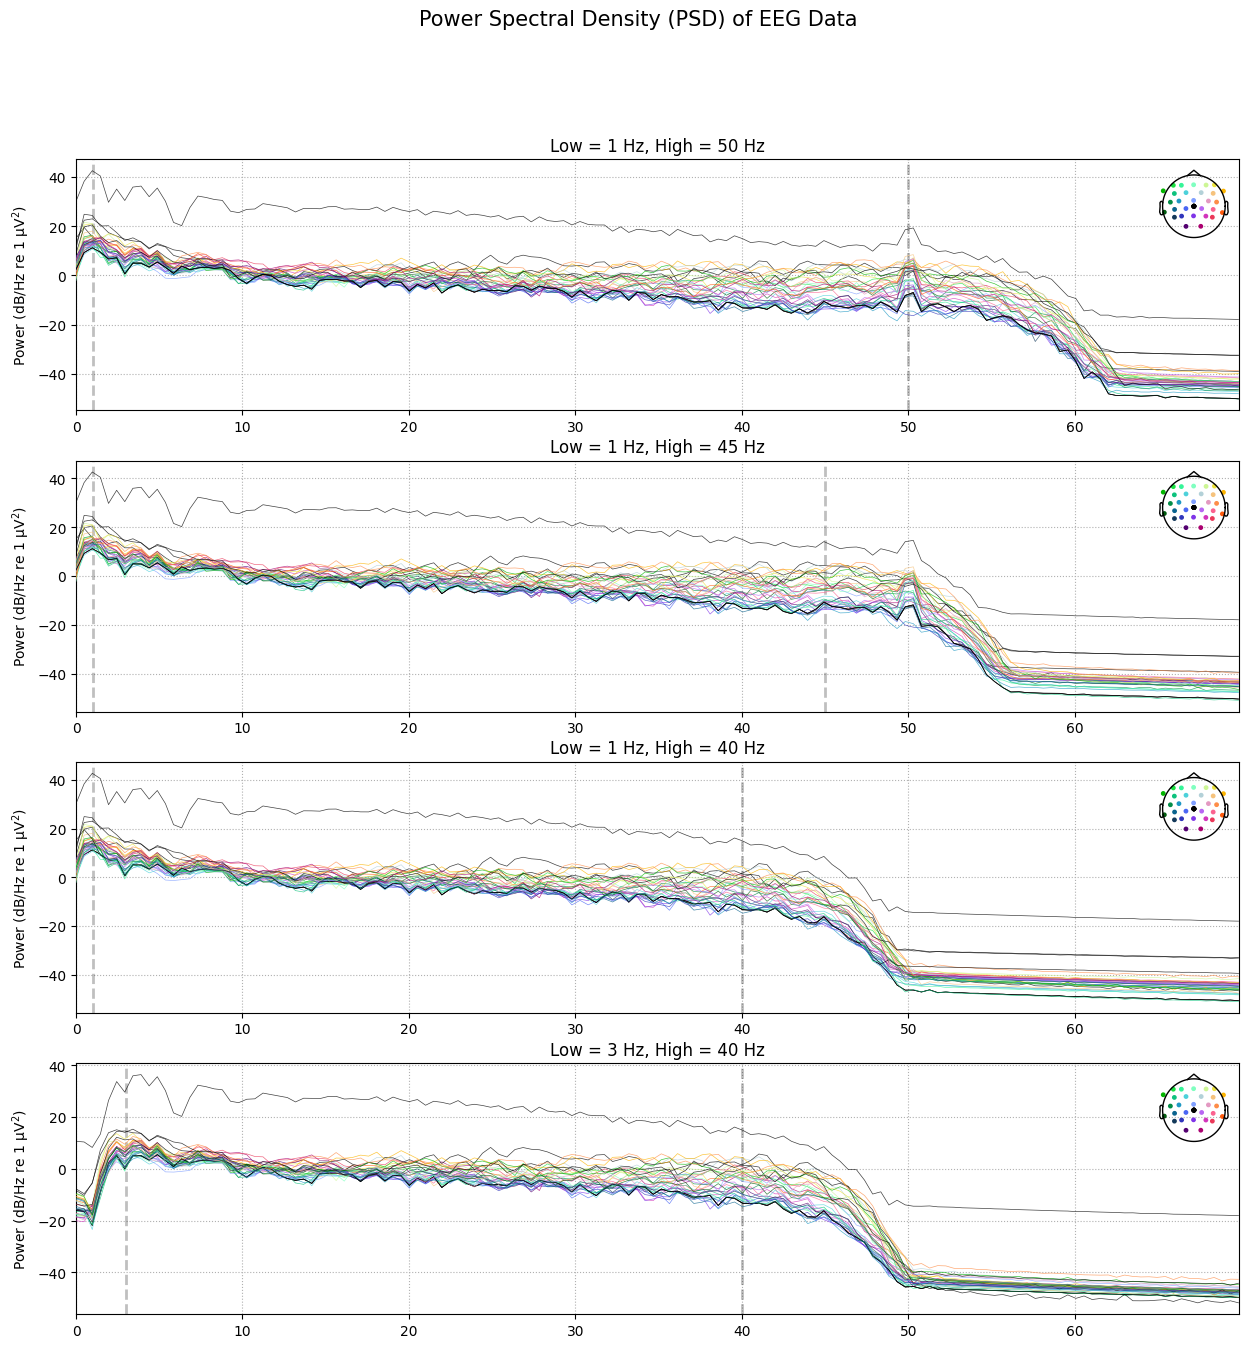

In [ ]:
import matplotlib.pyplot as plt

"""Let's get rid of noise by playing with filter parameters."""

# Define filter ranges
filter_params = [
    {'l_freq': 1, 'h_freq': 50},
    {'l_freq': 1, 'h_freq': 45},
    {'l_freq': 1, 'h_freq': 40},
    {'l_freq': 3, 'h_freq': 40}
]

# Create a single figure for all PSD plots
fig, axes = plt.subplots(len(filter_params), 1, figsize=(15, 15))
fig.suptitle("Power Spectral Density (PSD) of EEG Data", fontsize=15)  # Larger font size and adjust position

# Apply each filter and plot the PSD
for i, params in enumerate(filter_params):
    raw_filtered = raw.copy()  # Copy the original raw data
    raw_filtered.filter(l_freq=params['l_freq'], h_freq=params['h_freq'])
    psd = raw_filtered.compute_psd(fmax=70)
    psd.plot(axes=axes[i], show=False)  # Plot on the specified subplot
    axes[i].set_title(f"Low = {params['l_freq']} Hz, High = {params['h_freq']} Hz", fontsize=12)  # Adjust subtitle font size

Explore your own implementations! https://mne.tools/stable